In [1]:
import sys
sys.path.append('/home/lessa/smodels')
from smodels.experiment.databaseObj import Database
from smodels.tools.physicsUnits import GeV,fb,pb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
db = Database('/home/lessa/smodels-database')

In [8]:
exp = db.getExpResults(analysisIDs=['ATLAS-SUSY-2015-06'],dataTypes=['efficiencyMap'],txnames=['T1'],
                       useSuperseded=True,useNonValidated=True,datasetIDs=[None])[0]

In [10]:
tx = exp.getTxNames()[0]
data = tx.txnameData

In [19]:
xpts = []
ypts = []
zpts = []
for ipt,pt in enumerate(data.tri.points):
    fullpt = np.append(pt,[0.]*(data.full_dimensionality-len(pt)))        
    mass = np.dot(data._V,fullpt) + data.delta_x        
    mass = mass.tolist()[0]
    xpts.append(mass[0])
    ypts.append(mass[1])
    zpts.append(data.xsecUnitless[ipt])

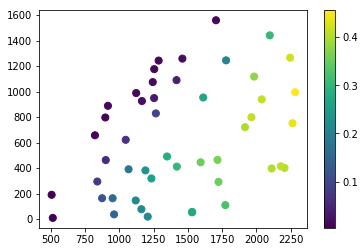

In [21]:
from math import log
# lzvals = [log(z) for z in zvals]
fig = plt.figure()
plt.scatter(xpts, ypts, c=zpts, s=50)
plt.colorbar()
# plt.clim(0.,30.)
# plt.xlim(1000.,1100.)
# plt.ylim(0.,400.)
plt.show()

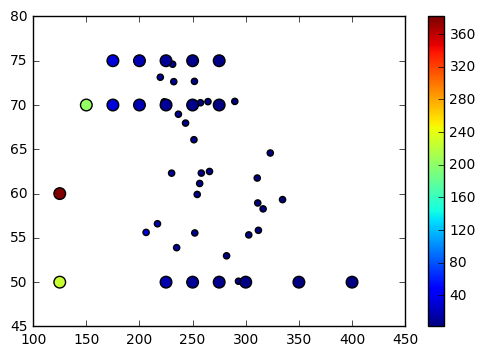

In [22]:
fig = plt.figure()
allx = inxvals + xvals
ally = inyvals + yvals
allz = inzvals + zvals
allsize = [20]*len(inxvals) + [70]*len(xvals)
plt.scatter(allx, ally, c=allz, s=allsize)
# plt.scatter(inxvals, inyvals, c=inLzvals)
# plt.scatter(xvals, yvals, c=lzvals,s=50)
plt.colorbar()
# plt.clim(-1e-5,1e4)
# plt.xlim(500.,600.)
# plt.ylim(300.,600.)
plt.show()

In [15]:
print min(inzvals)

0.0


In [33]:
print inxvals[3],inyvals[3],inzvals[3]

212.337465293 5.59612346015 12.7071008641


In [35]:
for i,x in enumerate(xvals):
    if abs(x-200.) < 5. and abs(yvals[i]-20.) < 10.:
        print i

28


In [36]:
print xvals[28],yvals[28],zvals[28]

200.0 25.0 23.0


In [37]:
log(23.)

3.1354942159291497

In [38]:
log(12.7)

2.5416019934645457

In [18]:
m = [[571.157926242*GeV, 534.583889495*GeV, 498.009852749*GeV]]*2
print tx.txnameData.getValueFor(m)
m = [[571.0*GeV, 534.6*GeV, 498.0*GeV]]*2
print tx.txnameData.getValueFor(m)

-7.53105444673e-16
1.50617283951e-07


In [72]:
pts = np.array([[x,tx.txnameData.getValueFor([[300.*GeV, 1.49E+02*GeV, x*GeV]]*2).asNumber(pb)] for x in np.arange(50.,100.,1.)])

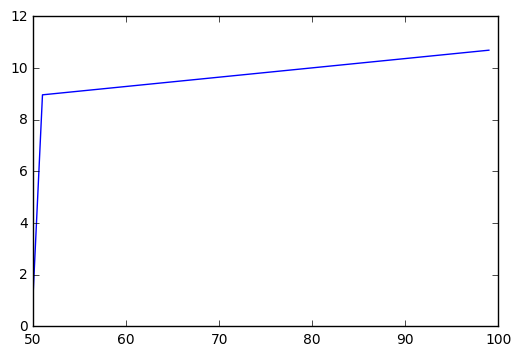

In [73]:
plt.plot(pts[:,0],pts[:,1])
plt.show()